# libraries importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sorting csv files out

### population

In [175]:
population_initial = pd.read_excel("C:/Users/wypyc/Desktop/mentoring/data/population_v.xlsx", header = 2) 
population = population_initial[:16]
del population["Dane"]
del population["nts"]

In [202]:
population_T = population.transpose()

population_T.columns = population_T.iloc[0] 

### index

In [177]:
index = pd.read_excel("C:/Users/wypyc/Desktop/mentoring/data/index.xlsx", header = 0) 
del index["Nazwa zmiennej"]
del index["Jednostka terytorialna"]
del index["Flaga"]

index_compressed = index[index["Sposób prezentacji"].str.contains("An")==True]

### prices 

In [178]:
prices_primary = pd.read_excel("C:/Users/wypyc/Desktop/mentoring/data/prices.xlsx", 
                       header = 6, 
                       sheet_name = "Rynek pierwotny") 

prices_ok = prices_primary.iloc[:,:18]

#jeden kwartał
prices_ok = prices_ok[prices_ok["Kwartał"].str.contains("IV") == True]
prices_ok = prices_ok.reset_index()


prices_ok.to_excel("C:/Users/wypyc/Desktop/mentoring/data/primary_market.xlsx")

In [179]:
prices_aftermarket = pd.read_excel("C:/Users/wypyc/Desktop/mentoring/data/prices.xlsx", 
                       header = 6, 
                       sheet_name = "Rynek wtórny") 

prices_after_ok = prices_aftermarket.iloc[:,:18]

#jeden kwartał
prices_after_ok = prices_after_ok[prices_after_ok["Kwartał"].str.contains("IV") == True]
prices_after_ok = prices_after_ok.reset_index()

prices_after_ok.to_excel("C:/Users/wypyc/Desktop/mentoring/data/aftermarket.xlsx")

## set year range

In [180]:
min_list = []
max_list = []
min_list.append(int(population_T.index[1:].min()))
max_list.append(int(population_T.index[1:].max()))

min_list.append(int(index["Rok"].min()))
max_list.append(int(index["Rok"].max()))

min_list.append(int(prices_aftermarket["Kwartał"][0][-4:]))
ind = len(prices_aftermarket.Kwartał)
max_list.append(int(prices_aftermarket["Kwartał"][ind-1][-4:]))


In [181]:
down = max(min_list)
up = min(max_list)
down,up

(2006, 2021)

# sorting again

### population

In [203]:
popul = population_T.drop(axis=0, labels = "nazwa")

popul.drop(popul[(popul.index > up) == True].index, inplace = True)
popul.drop(popul[(popul.index < down) == True].index, inplace = True)
popul = popul.reset_index()

popul.to_excel("C:/Users/wypyc/Desktop/mentoring/data/population_ok.xlsx")

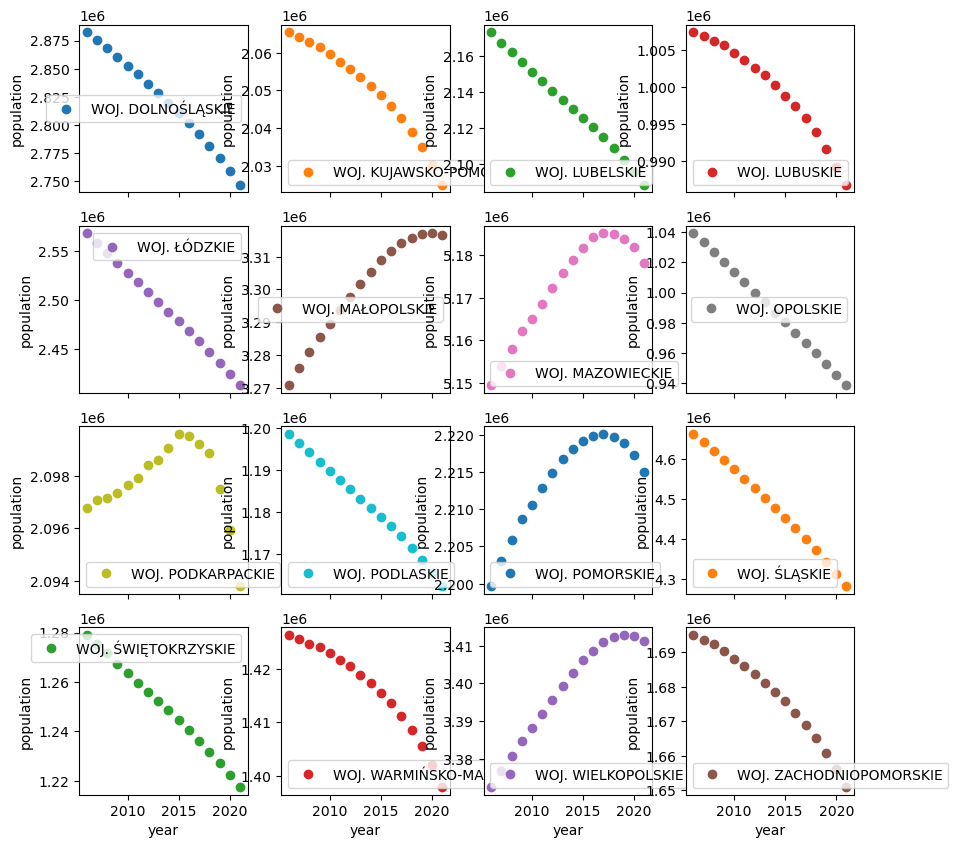

In [183]:
colnames = list(popul.columns)

popul.plot(x="index", y=list(popul.columns[1:]), kind = 'line', legend=True, 
                 subplots = True, sharex = True, figsize = (10,10), ls="none", 
           marker="o", layout = (4,4), label = colnames[1:],
          xlabel = "year", ylabel = "population")
plt.show()


In [204]:
popul_percent = popul
year = popul["index"]

In [205]:
def convert_to_percent(df,i):
    df.iloc[i] = (df.iloc[i] - df.iloc[0]) / df.iloc[0]

def table_percent(new_df,column):
    new_df[column] = year
    for k in range(1,len(new_df)):
        convert_to_percent(new_df,k)
    new_df[0] = convert_to_percent(new_df,0)
    new_df[column] = year
    return new_df

percent_popul = table_percent(popul_percent,"index")

percent_popul.to_excel("C:/Users/wypyc/Desktop/mentoring/data/population_percent.xlsx")

In [206]:
percent_popul

nazwa,index,WOJ. DOLNOŚLĄSKIE,WOJ. KUJAWSKO-POMORSKIE,WOJ. LUBELSKIE,WOJ. LUBUSKIE,WOJ. ŁÓDZKIE,WOJ. MAŁOPOLSKIE,WOJ. MAZOWIECKIE,WOJ. OPOLSKIE,WOJ. PODKARPACKIE,WOJ. PODLASKIE,WOJ. POMORSKIE,WOJ. ŚLĄSKIE,WOJ. ŚWIĘTOKRZYSKIE,WOJ. WARMIŃSKO-MAZURSKIE,WOJ. WIELKOPOLSKIE,WOJ. ZACHODNIOPOMORSKIE,0
0,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,2007,-0.002316,-0.000563,-0.002628,-0.000528,-0.00385,0.001619,0.00088,-0.005927,0.000145,-0.001755,0.001519,-0.004391,-0.002851,-0.00048,0.001245,-0.000794,None
2,2008,-0.00483,-0.001278,-0.004962,-0.00111,-0.00766,0.00309,0.001667,-0.012127,0.000179,-0.003526,0.002856,-0.008902,-0.005864,-0.001117,0.002434,-0.001625,None
3,2009,-0.00744,-0.00193,-0.007536,-0.001706,-0.011686,0.004514,0.002478,-0.0183,0.000272,-0.005483,0.004079,-0.013725,-0.009114,-0.001617,0.003592,-0.00276,None
4,2010,-0.010223,-0.00282,-0.010118,-0.002757,-0.015655,0.005741,0.003037,-0.024898,0.000415,-0.007305,0.004989,-0.018664,-0.012046,-0.002368,0.004675,-0.004032,None
5,2011,-0.012959,-0.003758,-0.012403,-0.003726,-0.019484,0.006994,0.003719,-0.031432,0.000538,-0.009183,0.006005,-0.023778,-0.01504,-0.003316,0.005758,-0.00531,None
6,2012,-0.015826,-0.004675,-0.014878,-0.004786,-0.023409,0.008288,0.004433,-0.037927,0.000763,-0.010953,0.006892,-0.028891,-0.017984,-0.00409,0.006819,-0.006755,None
7,2013,-0.018643,-0.005697,-0.01726,-0.005747,-0.027281,0.009473,0.005117,-0.044274,0.000854,-0.012911,0.007769,-0.034055,-0.020883,-0.005191,0.007946,-0.008182,None
8,2014,-0.021615,-0.00685,-0.019511,-0.007099,-0.03109,0.010581,0.005736,-0.050829,0.001085,-0.01467,0.008385,-0.039325,-0.023796,-0.00622,0.008955,-0.009672,None
9,2015,-0.024707,-0.008024,-0.021733,-0.008531,-0.034851,0.011692,0.006296,-0.057032,0.001333,-0.016478,0.008871,-0.044782,-0.026925,-0.007613,0.009968,-0.011353,None


array([[<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>],
       [<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>],
       [<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>],
       [<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='year', ylabel='population'>]], dtype=object)

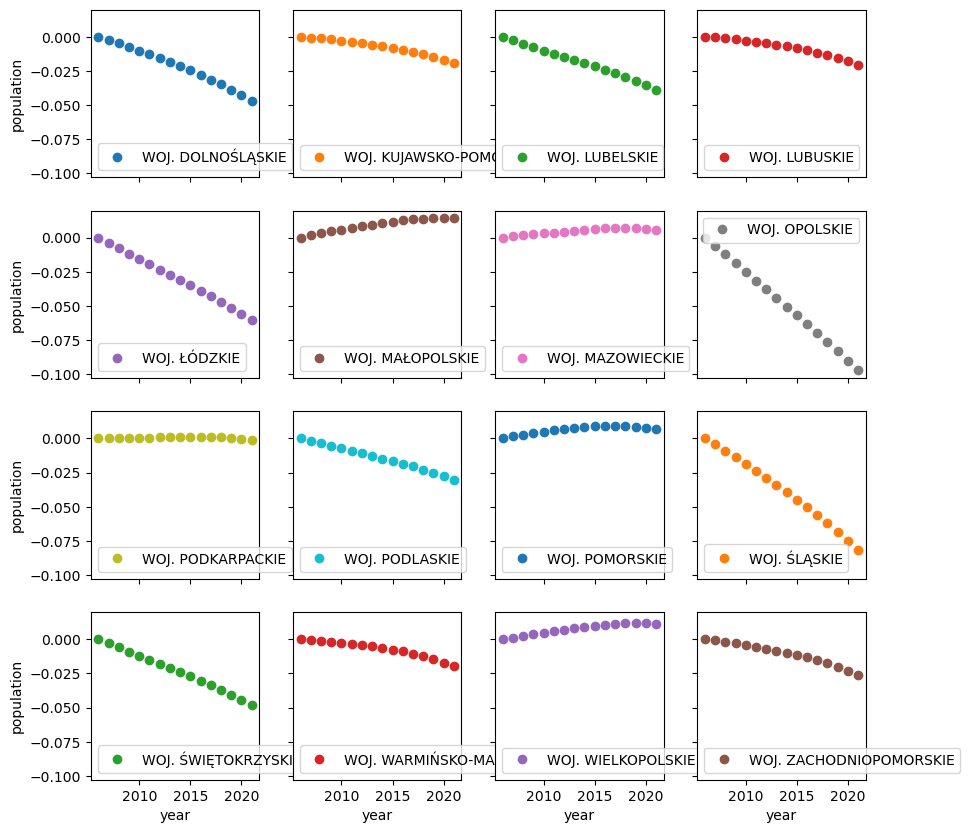

In [188]:
colnames = list(percent_popul.columns)

popul.plot(x="index", y=list(percent_popul.columns[1:]), kind = 'line', legend=True, 
                 subplots = True, sharex = True, sharey = True, figsize = (10,10), 
           ls="none", marker="o", layout = (4,4), label = colnames[1:],
          xlabel = "year", ylabel = "population")
#plt.show()


przyjmij sobie jakąs bazę na początku i względem niej zrób lepsze. procentowa dynamika

### index

In [165]:
index_compressed.drop(index_compressed[index_compressed["Rok"] < down].index, inplace = True)
index_compressed.drop(index_compressed[index_compressed["Rok"] > up].index, inplace = True)

index_compressed.to_excel("C:/Users/wypyc/Desktop/mentoring/data/index_ok.xlsx")

index_compressed = index_compressed[index_compressed["Kwartał"].str.contains("IV") == True]
index_compressed = index_compressed.reset_index()

In [142]:
index_compressed

,index,Sposób prezentacji,Rok,Kwartał,Wartość
0,15,Analogiczny okres roku poprzedniego = 100,2021,IV kwartał,107.7
1,27,Analogiczny okres roku poprzedniego = 100,2020,IV kwartał,102.8
2,39,Analogiczny okres roku poprzedniego = 100,2019,IV kwartał,102.8
3,51,Analogiczny okres roku poprzedniego = 100,2018,IV kwartał,101.4
4,63,Analogiczny okres roku poprzedniego = 100,2017,IV kwartał,102.2
5,75,Analogiczny okres roku poprzedniego = 100,2016,IV kwartał,100.2
6,87,Analogiczny okres roku poprzedniego = 100,2015,IV kwartał,99.4
7,99,Analogiczny okres roku poprzedniego = 100,2014,IV kwartał,99.3
8,111,Analogiczny okres roku poprzedniego = 100,2013,IV kwartał,100.7
9,123,Analogiczny okres roku poprzedniego = 100,2012,IV kwartał,102.9


C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rok', ylabel='Wartość'>

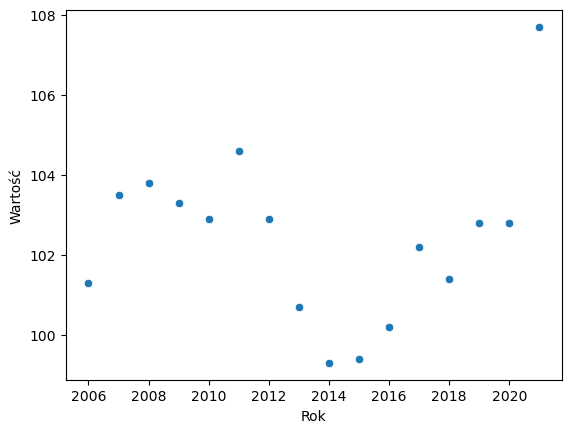

In [144]:
sns.scatterplot(index_compressed["Rok"], index_compressed["Wartość"])

inflacja rok do roku jedną wybraną

### prices

# wtórny ważny!!

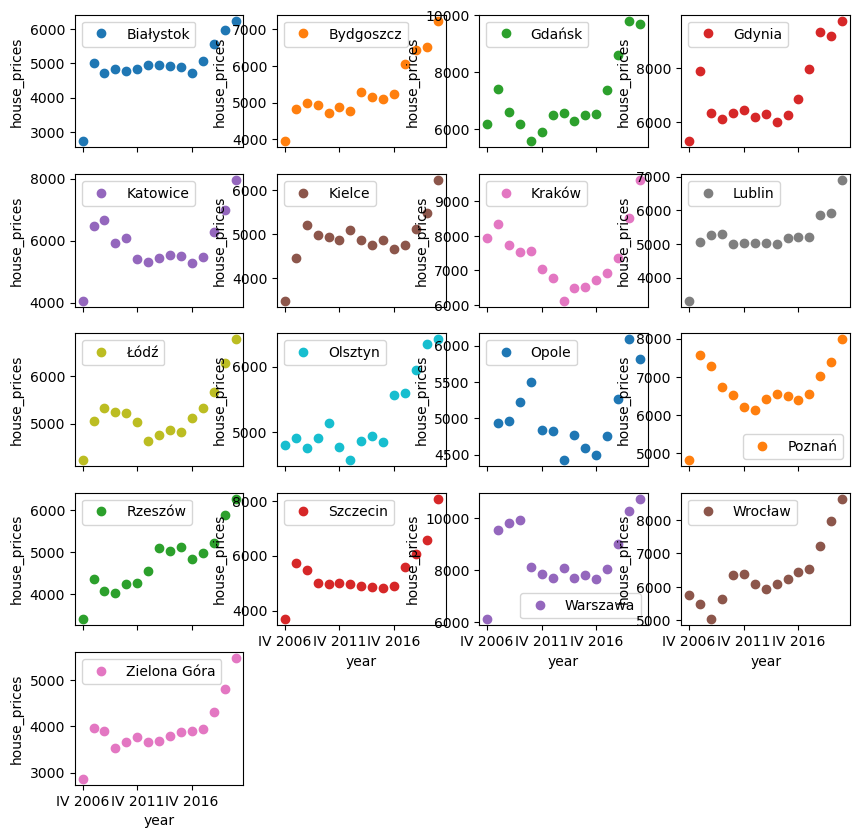

In [150]:
colnames_price = list(prices_ok.columns)

prices_ok.plot(x="Kwartał", y=list(prices_ok.columns[2:]), kind = 'line', legend=True, 
                 subplots = True, sharex = True, figsize = (10,10), ls="none", 
           marker="o", layout = (5,4), label = colnames_price[2:],
          xlabel = "year", ylabel = "house_prices")
plt.show()


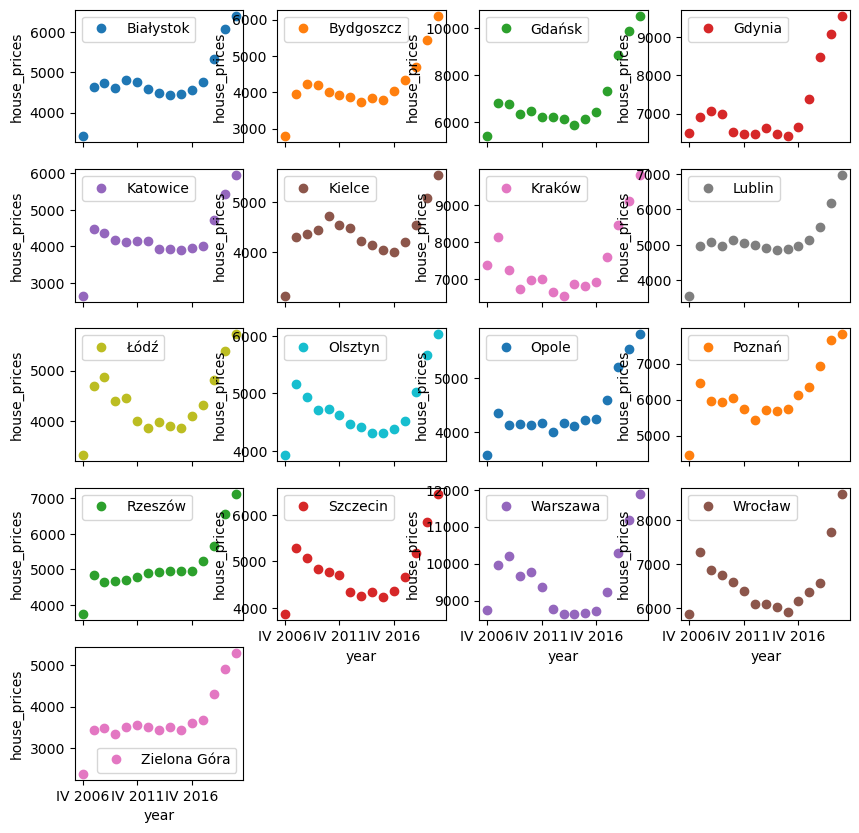

In [151]:
colnames_price = list(prices_after_ok.columns)

prices_after_ok.plot(x="Kwartał", y=list(prices_after_ok.columns[2:]), kind = 'line', legend=True, 
                 subplots = True, sharex = True, figsize = (10,10), ls="none", 
           marker="o", layout = (5,4), label = colnames_price[2:],
          xlabel = "year", ylabel = "house_prices")
plt.show()


In [208]:
new_prices = prices_after_ok
percent_prices = table_percent(new_prices,"Kwartał")

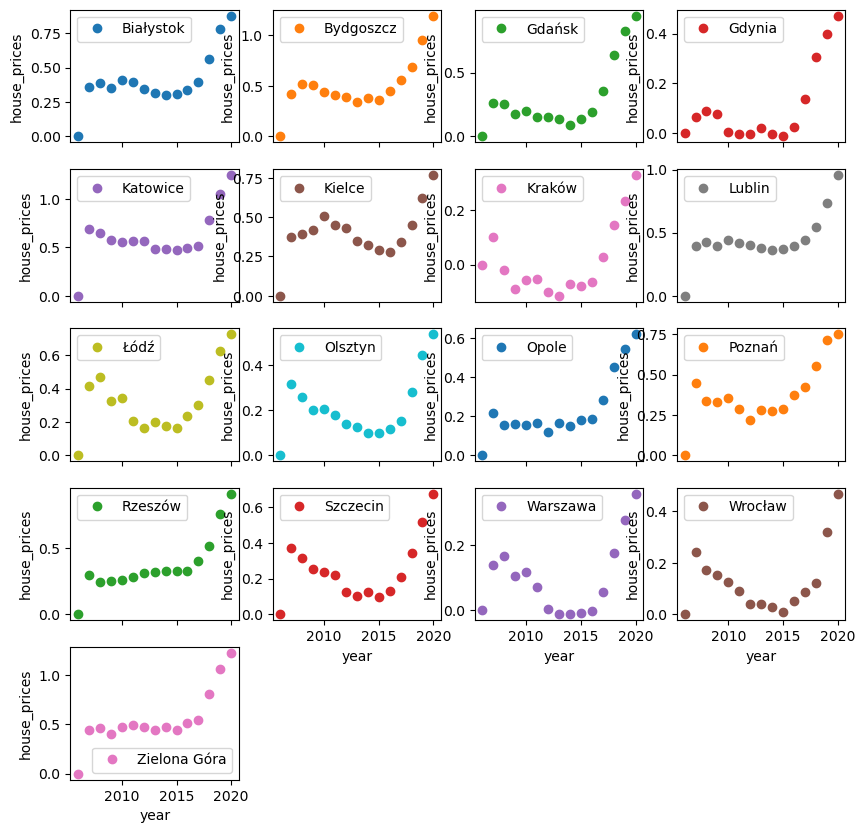

In [210]:
colnames_price = list(percent_prices.columns)

percent_prices.plot(x="Kwartał", y=list(percent_prices.columns[2:]), kind = 'line', legend=True, 
                 subplots = True, sharex = True, figsize = (10,10), ls="none", 
           marker="o", layout = (5,4), label = colnames_price[2:],
          xlabel = "year", ylabel = "house_prices")
plt.show()
